In [24]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

#### Load header into string array

In [25]:
# with open('/Users/rmueller/Projects/MIDOSS/results/MediumFloater/SOG_21nov17-28nov17_EvapExposureTest/resOilOutput.sro', 'r') as the_file:
#     all_data = [line.strip() for line in the_file.readlines()]
#     header = all_data[4] 

# parse directory name to create output file names
# Assumes the last 3 directory names describe oil_type, location and date
input_dir = '/Users/rmueller/Projects/MIDOSS/results/OS2020/akns/SB/15jan2018/'
dir_str = input_dir.split('/')
ndirs = len(dir_str)
out_tag = test_split[ndirs-4] + '_' + test_split[ndirs-3] + '_' + test_split[ndirs-2]

# define input file name
input_file = input_dir + 'resOilOutput.sro'

with open(input_file, 'r') as the_file:
    all_data = [line.strip() for line in the_file.readlines()]
    header = all_data[4]
    
# Order header into list array by splitting up string
header_arr = []
header_arr = header.split(' ')
# Remove emtpy entries from list
header_arr = np.asarray([x for x in header_arr if x != ''])

#### Load data

In [26]:
data2D = np.genfromtxt(input_file, skip_header=6, skip_footer=4)
nrows,ncols = data2D.shape

#### Create structured Array

In [27]:
# define structure of structured array
dtype = [('Header',(np.str_,22)),('Values', np.float64)]

# create index list for for-loop over columns
header_range = range(header_arr.size)
data_range = range(nrows)

# Assign 2D data and header strings to structured array
massbalance = np.array([[(header_arr[hdr_index], data2D[data_index, hdr_index]) for hdr_index in header_range] for data_index in data_range], dtype=dtype)

In [28]:
[data_len, ncols] = massbalance.shape

#### define the array indices corresponding to mass balance numbers

In [29]:
# mass
i_mevaporated = 15
i_mdispersed  = 18
i_mdissolved  = 24
i_mbio        = 37
i_msedimented   = 21
i_mwatercontent = 33

# volume
i_voloilbeached = 8
i_volumebeached = 9
i_volumeoil     = 10
i_volume        = 11
i_vwatercontent = 34

# oil properties
i_density   = 35
i_viscosity = 36 

# spill area
i_area = 12
i_theorical_area = 13

# analyte mass (I thought this was dissolved but the numbers are more reflective of dispersed)
i_analytemass0 = 42
i_analytemass1 = 43
i_analytemass2 = 44
i_analytemass3 = 45
i_analytemass4 = 46

# biodegredation
i_bio0 = 47
i_bio0 = 48
i_bio0 = 49
i_bio0 = 50
i_bio0 = 51

In [31]:
# define output file names
o_massbalance    = input_dir + 'massbalance.png'
o_volumebeached  = input_dir + 'volumebeached.png'
o_volumefloating = input_dir + 'volumefloating.png'
o_massbalance_wtotal = input_dir + 'massbalance_wtotal.png'
o_density_viscosity  = input_dir + 'density_viscosity.png'
o_analyte_mass  = input_dir + 'analyte_mass.png'
o_analyte_bio   = input_dir + 'analyte_bio.png'
o_spill_area    = input_dir + 'spill_area.png'
o_mwatercontent = input_dir + 'mwater_content.png'

#### Plot results

In [32]:
plot_data = [15,18,24,37]
header_arr[plot_data]

array(['MEvaporated', 'MDispersed', 'MDissolved', 'MBio'],
      dtype='<U22')

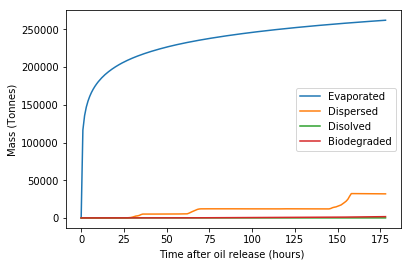

In [33]:
plot_data = [15,18,24,37]
#plt.plot([data2D[range(191), data_index] for data_index in plot_data])
plt.plot(data2D[range(data_len), plot_data[0]])
plt.plot(data2D[range(data_len), plot_data[1]])
plt.plot(data2D[range(data_len), plot_data[2]])
plt.plot(data2D[range(data_len), plot_data[3]])
plt.ylabel('Mass (Tonnes)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['Evaporated', 'Dispersed','Disolved','Biodegraded'])
plt.savefig(o_massbalance)

### plot volume oil beached

In [34]:
# indices of data_2D that correspond to VolOilBeached and VolumeBeached
plot_data = [8,9]
VolOilBeached = data2D[range(data_len), plot_data[0]]
VolumeBeached = data2D[range(data_len), plot_data[1]]
VolumeWaterBeached  = VolumeBeached - VolOilBeached

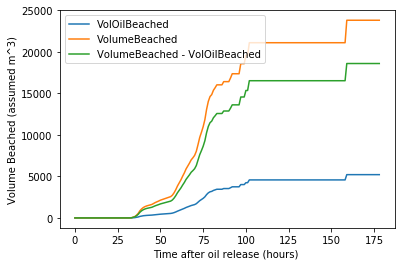

In [35]:
#plt.plot([data2D[range(191), data_index] for data_index in plot_data])
plt.plot(VolOilBeached)
plt.plot(VolumeBeached)
plt.plot(VolumeWaterBeached)
plt.ylabel('Volume Beached (assumed m^3)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['VolOilBeached', 'VolumeBeached','VolumeBeached - VolOilBeached'])
plt.savefig(o_volumebeached)

### plot volume oil floating

In [36]:
plot_data = [10,11,34]
VolumeOil = data2D[range(data_len), plot_data[0]]
Volume    = data2D[range(data_len), plot_data[1]]
VWaterContent    = data2D[range(data_len), plot_data[2]]
VolumeWater   = Volume - VolumeOil

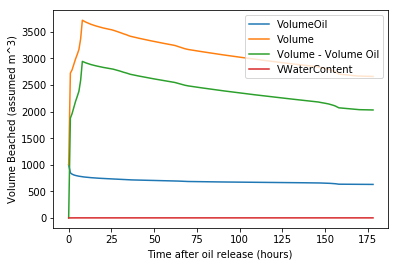

In [37]:
#plt.plot([data2D[range(191), data_index] for data_index in plot_data])
plt.plot(VolumeOil)
plt.plot(Volume)
plt.plot(VolumeWater)
plt.plot(VWaterContent)
plt.ylabel('Volume Beached (assumed m^3)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['VolumeOil', 'Volume','Volume - Volume Oil', 'VWaterContent'],loc='upper right')
plt.savefig(o_volumefloating)

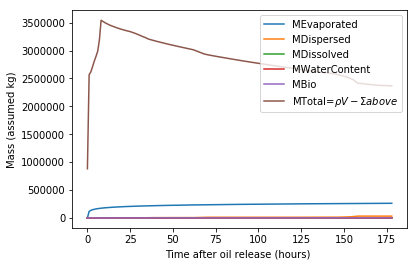

In [39]:
# mass of floating oil
MassOil = data2D[range(data_len), 7]
Volume  = data2D[range(data_len), 11]
Density = data2D[range(data_len), 35]
MOil = Volume * Density

# mass loss from weathering 
plot_data = [15,18,24,33,37]
MEvaporated = data2D[range(data_len), plot_data[0]]
MDispersed  = data2D[range(data_len), plot_data[1]]
MDissolved  = data2D[range(data_len), plot_data[2]]
MWaterContent = data2D[range(data_len), plot_data[3]]
MBio = data2D[range(data_len), plot_data[4]]
MTotal = MOil - MEvaporated - MDispersed - MDissolved - MBio

plt.plot(MEvaporated)
plt.plot(MDispersed)
plt.plot(MDissolved)
plt.plot(MWaterContent)
plt.plot(MBio)
plt.plot(MTotal)
plt.ylabel('Mass (assumed kg)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['MEvaporated', 'MDispersed','MDissolved', 'MWaterContent', 'MBio', r'MTotal=$\rho V - \Sigma above$'],loc='upper right')
plt.savefig(o_massbalance_wtotal)

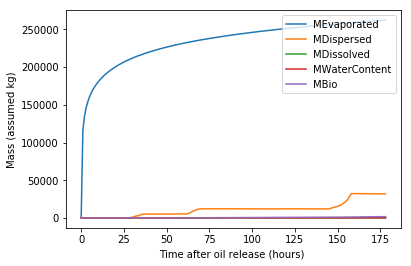

In [40]:
plt.plot(MEvaporated)
plt.plot(MDispersed)
plt.plot(MDissolved)
plt.plot(MWaterContent)
plt.plot(MBio)
plt.ylabel('Mass (assumed kg)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['MEvaporated', 'MDispersed', 'MDissolved', 'MWaterContent', 'MBio'],loc='upper right')
plt.savefig('MassBalance.png')

### plot density and viscosity

In [41]:
plot_data = [35,36]
Density = data2D[range(data_len), plot_data[0]]
Viscosity = data2D[range(data_len), plot_data[1]]

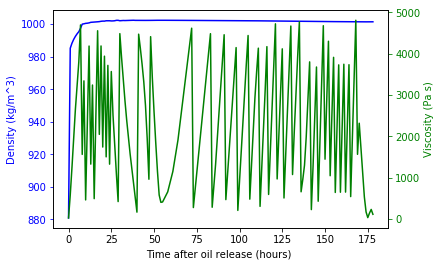

In [42]:
# create figure and axis objects with subplots()
fig,ax1 = plt.subplots()
ax1.plot(Density, color="blue")
ax1.set_ylabel('Density (kg/m^3)')
ax1.set_xlabel('Time after oil release (hours) ')
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')

# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
ax2.plot(Viscosity, color="green")
ax2.yaxis.label.set_color('green')
ax2.tick_params(axis='y', colors='green')
ax2.set_ylabel('Viscosity (Pa s)')
plt.savefig('DensityViscosity.png')

### plot Area and Teorical Area

In [43]:
plot_data = [12,13]
Area = data2D[range(data_len), plot_data[0]]
TeoricalArea = data2D[range(data_len), plot_data[1]]

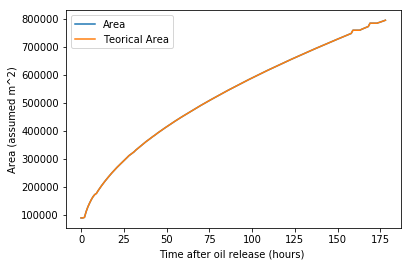

In [44]:
plt.plot(Area)
plt.plot(TeoricalArea)
plt.ylabel('Area (assumed m^2)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['Area', 'Teorical Area'])
plt.savefig('SpillArea.png')

### plot AnalyteMass (Dispersed Oil?)

In [45]:
plot_data = [42,43,44,45,46]
m0 = data2D[range(data_len), plot_data[0]]
m1 = data2D[range(data_len), plot_data[1]]
m2 = data2D[range(data_len), plot_data[2]]
m3 = data2D[range(data_len), plot_data[3]]
m4 = data2D[range(data_len), plot_data[4]]

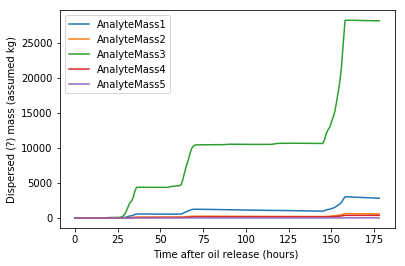

In [46]:
plt.plot(m0)
plt.plot(m1)
plt.plot(m2)
plt.plot(m3)
plt.plot(m4)

plt.ylabel('Dispersed (?) mass (assumed kg)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['AnalyteMass1', 'AnalyteMass2', 'AnalyteMass3', 'AnalyteMass4', 'AnalyteMass5'])
plt.savefig('AnalyteMass.png')

### plot AnalyteBio 

In [47]:
plot_data = [47,48,49,50,51]
m0 = data2D[range(data_len), plot_data[0]]
m1 = data2D[range(data_len), plot_data[1]]
m2 = data2D[range(data_len), plot_data[2]]
m3 = data2D[range(data_len), plot_data[3]]
m4 = data2D[range(data_len), plot_data[4]]

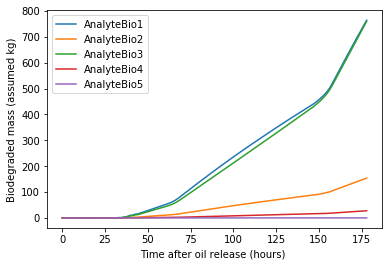

In [48]:
plt.plot(m0)
plt.plot(m1)
plt.plot(m2)
plt.plot(m3)
plt.plot(m4)

plt.ylabel('Biodegraded mass (assumed kg)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['AnalyteBio1', 'AnalyteBio2', 'AnalyteBio3', 'AnalyteBio4', 'AnalyteBio5'])
plt.savefig('AnalyteBio.png')

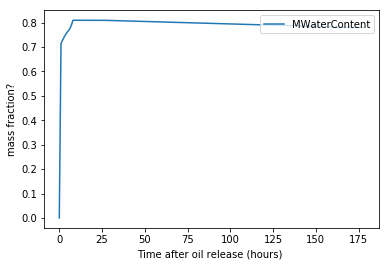

In [51]:
# I'm not yet sure what this is. Fraction of mass of particle containing water? 
plt.plot(MWaterContent)
plt.ylabel('mass fraction?')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['MWaterContent'],loc='upper right')
plt.savefig(o_mwatercontent)

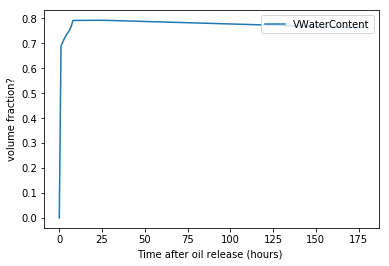

In [52]:
# I'm not yet sure what this is. Fraction of mass of particle containing water? 
plt.plot(VWaterContent)
plt.ylabel('volume fraction?')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['VWaterContent'],loc='upper right')
#plt.savefig(o_mwatercontent)